In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 94% 140M/149M [00:02<00:00, 35.8MB/s]
100% 149M/149M [00:02<00:00, 54.3MB/s]


In [3]:
# class to create a dataframe with path and labels
def get_class_paths(path):
  classes = []
  class_paths = []
  # Iterate through the directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    # Check if directory exists
    for image in os.listdir(label_path):
      image_path = os.path.join(label_path, image)

      classes.append(label)
      class_paths.append(image_path)

    df = pd.DataFrame({'Class path': class_paths, 'Class': classes})
  return df



In [4]:
tr_df = get_class_paths('/content/Training')
tr_df

,Class path,Class
0,/content/Training/notumor/Tr-no_0794.jpg,notumor
1,/content/Training/notumor/Tr-no_1039.jpg,notumor
2,/content/Training/notumor/Tr-no_0972.jpg,notumor
3,/content/Training/notumor/Tr-no_0559.jpg,notumor
4,/content/Training/notumor/Tr-no_1252.jpg,notumor
...,...,...
5707,/content/Training/glioma/Tr-gl_0255.jpg,glioma
5708,/content/Training/glioma/Tr-gl_0182.jpg,glioma
5709,/content/Training/glioma/Tr-gl_0553.jpg,glioma
5710,/content/Training/glioma/Tr-gl_0380.jpg,glioma


In [5]:
ts_df = get_class_paths('/content/Testing')
ts_df

,Class path,Class
0,/content/Testing/notumor/Te-no_0097.jpg,notumor
1,/content/Testing/notumor/Te-no_0301.jpg,notumor
2,/content/Testing/notumor/Te-noTr_0000.jpg,notumor
3,/content/Testing/notumor/Te-no_0222.jpg,notumor
4,/content/Testing/notumor/Te-no_0139.jpg,notumor
...,...,...
1306,/content/Testing/glioma/Te-gl_0280.jpg,glioma
1307,/content/Testing/glioma/Te-gl_0163.jpg,glioma
1308,/content/Testing/glioma/Te-gl_0194.jpg,glioma
1309,/content/Testing/glioma/Te-gl_0146.jpg,glioma


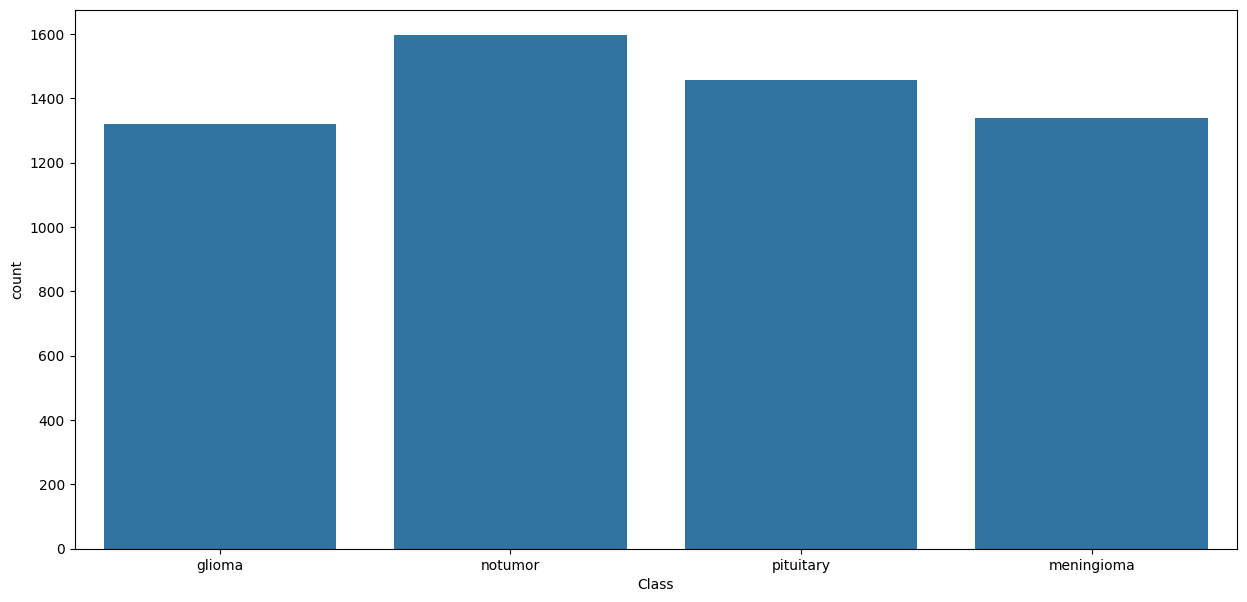

In [ ]:
# Count of images in each class
plt.figure(figsize=(15, 7))
sns.countplot(data=tr_df, x=tr_df['Class'])
plt.show()

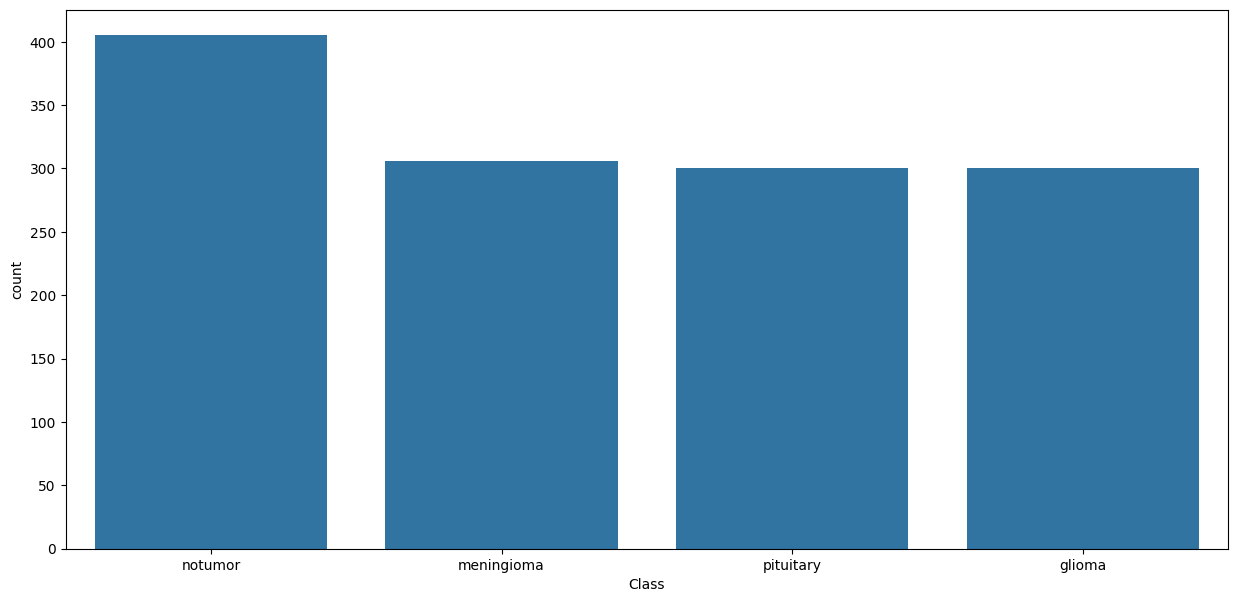

In [6]:
plt.figure(figsize=(15, 7))
sns.countplot(data=ts_df, x=ts_df['Class'])
plt.show()

In [7]:
# Split the dataset for training, testing and validating
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential # to build a layer-by-layer neural network
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [8]:
valid_df, ts_df = train_test_split(ts_df, train_size = 0.5, stratify=ts_df['Class']) # helps balance images per class


In [9]:
valid_df

,Class path,Class
666,/content/Testing/meningioma/Te-me_0280.jpg,meningioma
208,/content/Testing/notumor/Te-no_0287.jpg,notumor
131,/content/Testing/notumor/Te-no_0202.jpg,notumor
118,/content/Testing/notumor/Te-no_0317.jpg,notumor
535,/content/Testing/meningioma/Te-me_0087.jpg,meningioma
...,...,...
419,/content/Testing/meningioma/Te-me_0029.jpg,meningioma
503,/content/Testing/meningioma/Te-me_0124.jpg,meningioma
1057,/content/Testing/glioma/Te-gl_0196.jpg,glioma
1173,/content/Testing/glioma/Te-gl_0264.jpg,glioma


In [10]:
ts_df

,Class path,Class
985,/content/Testing/pituitary/Te-pi_0241.jpg,pituitary
1284,/content/Testing/glioma/Te-gl_0024.jpg,glioma
213,/content/Testing/notumor/Te-no_0255.jpg,notumor
965,/content/Testing/pituitary/Te-pi_0200.jpg,pituitary
473,/content/Testing/meningioma/Te-me_0047.jpg,meningioma
...,...,...
507,/content/Testing/meningioma/Te-me_0292.jpg,meningioma
325,/content/Testing/notumor/Te-no_0015.jpg,notumor
955,/content/Testing/pituitary/Te-pi_0177.jpg,pituitary
964,/content/Testing/pituitary/Te-pi_0033.jpg,pituitary


In [11]:
batch_size = 32 # experimental value
img_size = (299, 299)
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2)) # improve generalization with new data


In [12]:
ts_gen = ImageDataGenerator(rescale=1/255)

In [13]:
# Setting up dataflows
tr_gen = image_generator.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle = False)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


Xception Model, a type of CNN for image recognition. Developed by Francois Chollet. Breaks down image to make generalizations. Learns through backpropagation to adjust weights, as well as Gradient Descent. This method is called Transfer Learning - using a pre-existing model trained using ImageNet.

In [14]:
img_shape = (299, 299, 3)
base_model = tf.keras.applications.Xception(input_shape=img_shape, include_top=False, weights='imagenet', pooling = 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate = 0.3), # this prevents overfitting
    Dense(128, activation='relu'), # to understand non-linear relationships
    Dropout(rate = 0.25),
    Dense(4, activation='softmax') # create probability distribution
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
model.compile(Adamax(learning_rate = 0.001),
              loss='categorical_crossentropy', # measure of loss function for classification tasks
              # it is a way of assessing confidence of the model's predictions
              metrics=['accuracy', Precision(), Recall()],
              )

In [17]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 146s 809ms/step - accuracy: 0.9843 - loss: 0.0608 - precision: 0.9853 - recall: 0.9836 - val_accuracy: 0.9496 - val_loss: 0.1544 - val_precision: 0.9554 - val_recall: 0.9481
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 198s 786ms/step - accuracy: 0.9934 - loss: 0.0238 - precision: 0.9937 - recall: 0.9934 - val_accuracy: 0.9954 - val_loss: 0.0112 - val_precision: 0.9954 - val_recall: 0.9954
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 151s 836ms/step - accuracy: 0.9965 - loss: 0.0144 - precision: 0.9967 - recall: 0.9965 - val_accuracy: 0.9939 - val_loss: 0.0322 - val_precision: 0.9939 - val_recall: 0.9924
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 149s 820ms/step - accuracy: 0.9964 - loss: 0.0120 - precision: 0.9964 - recall: 0.9954 - val_accuracy: 0.9771 - val_loss: 0.1540 - val_precision: 0.9771 - val_recall: 0.9771
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 833ms/step - accuracy: 0.9965 - loss: 0.0148 - precision: 0.9969 - recall: 0.9964 - val_accuracy: 0.9908

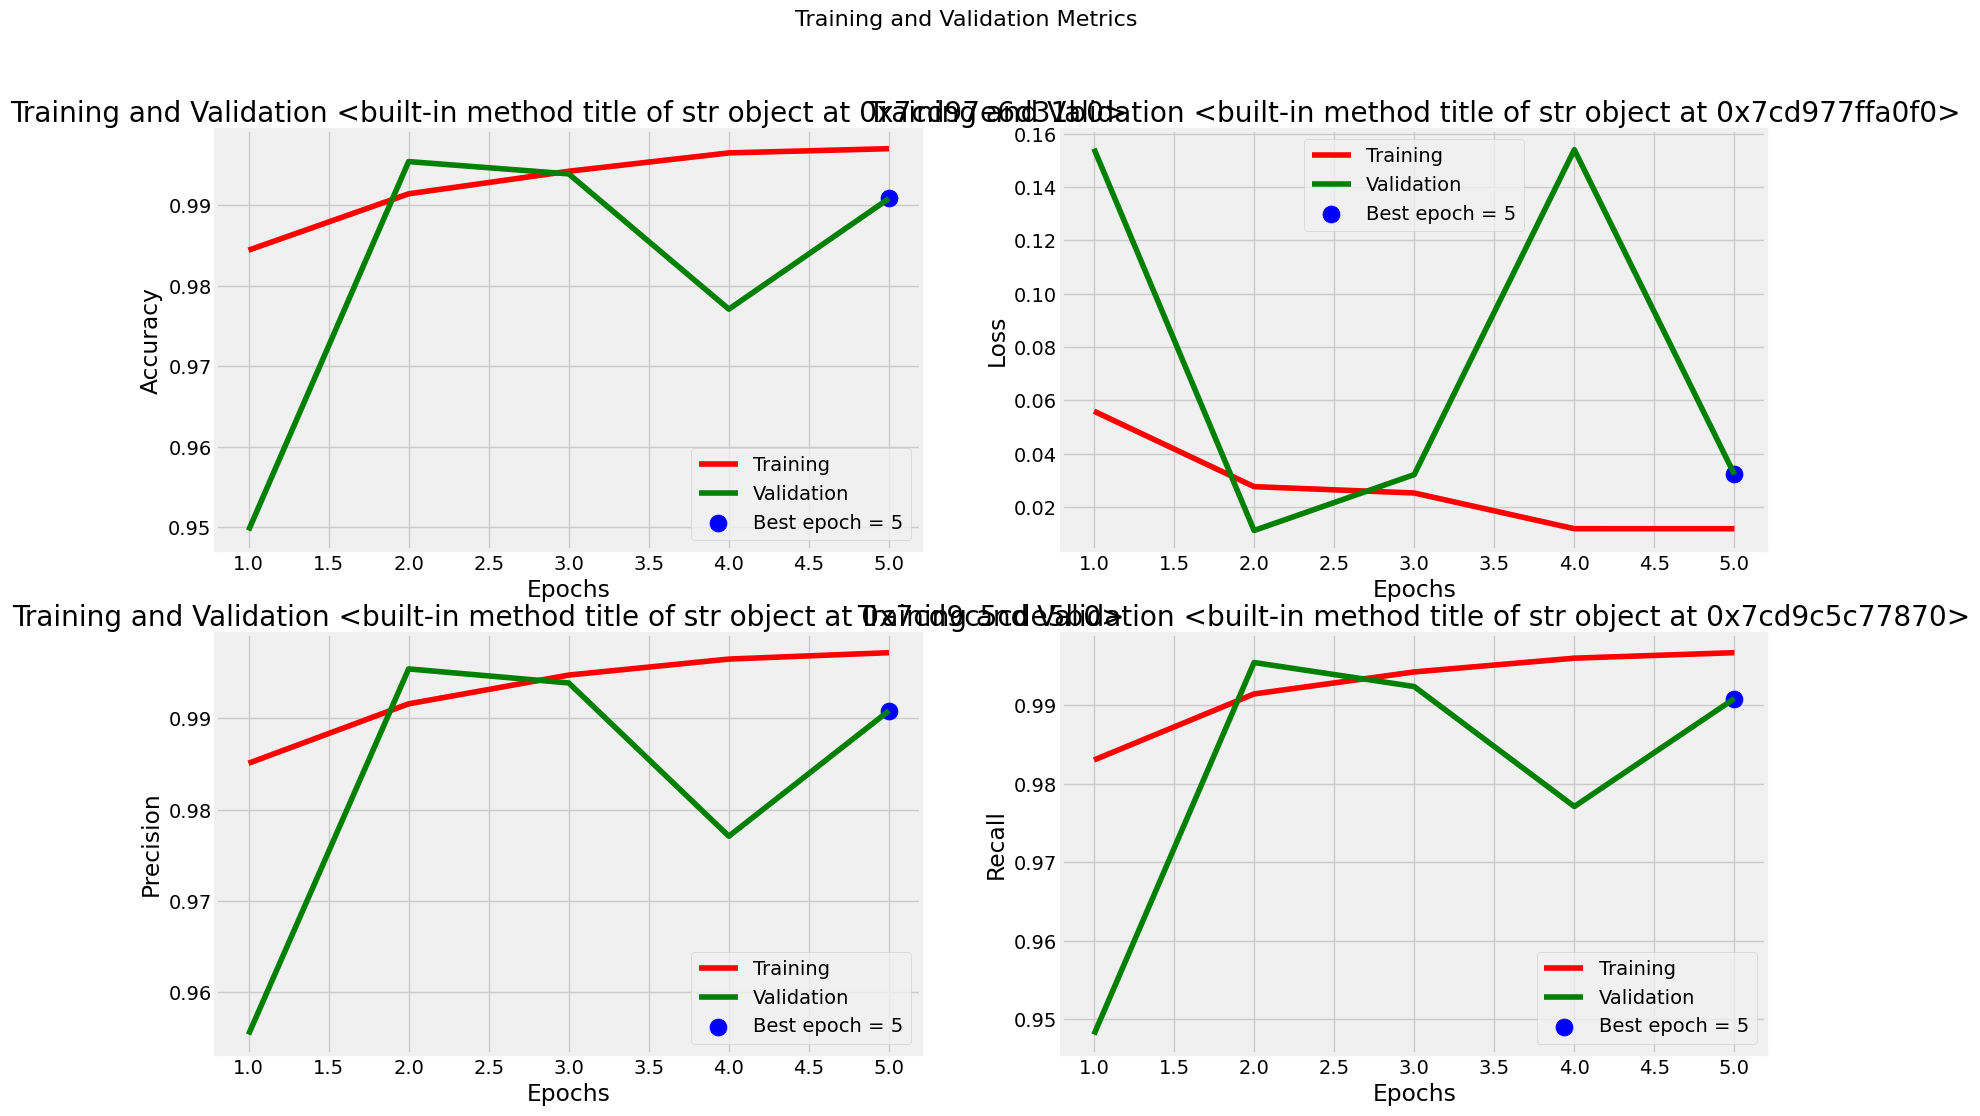

In [18]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find the critical values from epochs
best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss':
    idx = np.argmin(tr_metrics[m])
  else:
    idx = np.argmax(tr_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)
  plt.plot(epochs, tr_metrics[metric], 'r', label='Training')
  plt.plot(epochs, val_metrics[metric], 'g', label='Validation')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Training and Validation Metrics', fontsize=16)
plt.show()


In [19]:
train_score = model.evaluate(tr_gen, verbose = 1)
valid_score = model.evaluate(valid_gen, verbose = 1)
test_score = model.evaluate(ts_gen, verbose = 1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Testing Accuracy: {test_score[1]*100:.2f}%")
print(f"Testing Loss: {test_score[0]:.4f}")


179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 319ms/step - accuracy: 0.9995 - loss: 0.0022 - precision: 0.9995 - recall: 0.9995
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.9923 - loss: 0.0297 - precision: 0.9923 - recall: 0.9923
 1/41 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step - accuracy: 1.0000 - loss: 3.1035e-04 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.9902 - loss: 0.0718 - precision: 0.9902 - recall: 0.9902
Training Accuracy: 99.96%
Train Loss: 0.0022
Validation Accuracy: 98.93%
Validation Loss: 0.0304
Testing Accuracy: 98.48%
Testing Loss: 0.0992


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step


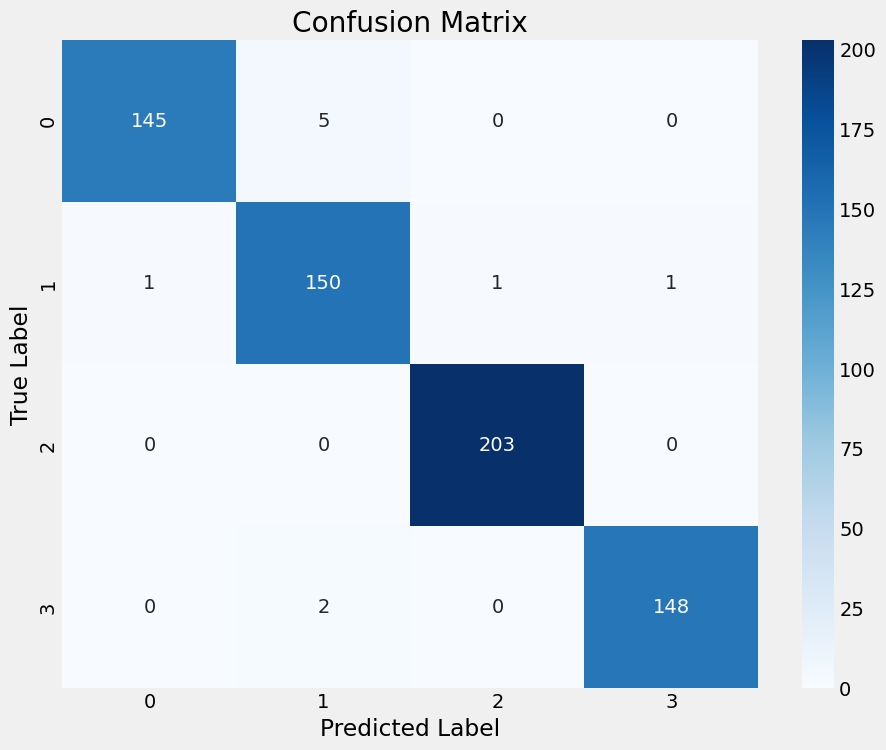

In [20]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

# Create and display the confusion matrix to show conidence level
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from PIL import Image

def predict(image_path: str) -> None:
  labels = list(class_dict.keys())
  plt.figure(figsize=(6, 8))

  # Load and process image
  img = Image.open(image_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis = 0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot image and probabilities
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f'Predicted Class: {predicted_class}')
  plt.subplot(2 ,1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize = 15)
  plt.title('Class Probabilities')

  ax = plt.gca()
  ax.bar_label(bars, fmt='%.2f')

  plt.tight_layout()
  plt.show()

  print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


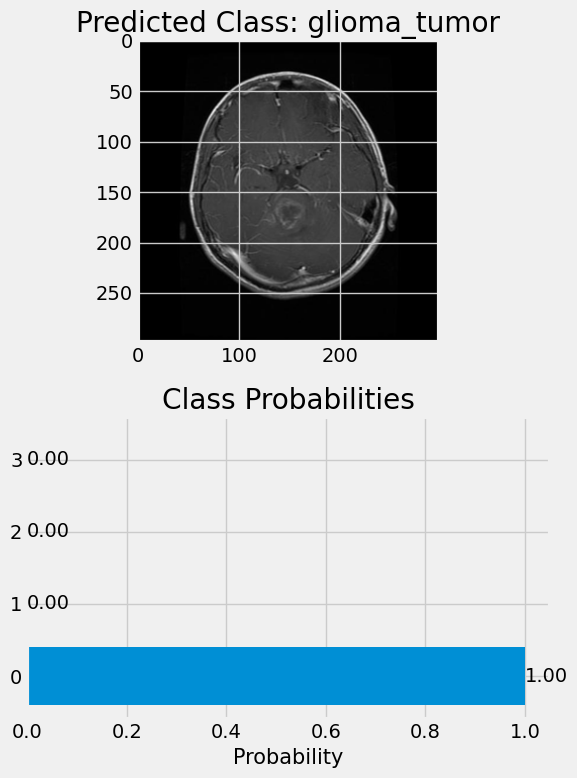

Predicted Class: glioma_tumor


In [31]:
predict('/content/Testing/glioma/Te-glTr_0007.jpg')

In [32]:
model.save_weights("xception_model.weights.h5")

Training Custom CNN

In [35]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [36]:
# Setting up dataflows

batch_size = 16
img_size = (224, 224)
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
ts_gen = ImageDataGenerator(rescale=1/255)

tr_gen = image_generator.flow_from_dataframe(
    dataframe=tr_df,
    x_col='Class path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size)

valid_gen = image_generator.flow_from_dataframe(
    dataframe=valid_df,
    x_col='Class path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size)

ts_gen = ts_gen.flow_from_dataframe(
    dataframe=ts_df,
    x_col='Class path',
    y_col='Class',
    batch_size=16,
    target_size=img_size,
    shuffle = False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [38]:
# Custom Sequential Model

cnn_model = Sequential()

# Convolutional Layers
cnn_model.add(Conv2D(512, (3, 3), padding = 'same', activation='relu', input_shape=(224, 224, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(256, (3, 3), padding = 'same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding = 'same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten output for fully connected layers
cnn_model.add(Flatten())

# Fully Connected Layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # Output layers with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate = 0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()],
              )

cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = cnn_model.fit(tr_gen, epochs=5, validation_data=valid_gen)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 140s 327ms/step - accuracy: 0.5319 - loss: 2.5052 - precision_1: 0.6926 - recall_1: 0.3523 - val_accuracy: 0.7084 - val_loss: 1.0551 - val_precision_1: 0.7444 - val_recall_1: 0.6626
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 106s 297ms/step - accuracy: 0.8138 - loss: 0.7899 - precision_1: 0.8391 - recall_1: 0.7824 - val_accuracy: 0.7908 - val_loss: 0.7395 - val_precision_1: 0.8025 - val_recall_1: 0.7695
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 108s 299ms/step - accuracy: 0.8455 - loss: 0.5692 - precision_1: 0.8610 - recall_1: 0.8261 - val_accuracy: 0.8656 - val_loss: 0.5338 - val_precision_1: 0.8732 - val_recall_1: 0.8519
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 106s 296ms/step - accuracy: 0.8932 - loss: 0.4396 - precision_1: 0.9032 - recall_1: 0.8816 - val_accuracy: 0.8794 - val_loss: 0.4323 - val_precision_1: 0.8941 - val_recall_1: 0.8763
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 141s 292ms/step - accuracy: 0.9146 - loss: 0.3714 - precision_1: 0.9218 - recall_1: 0.9

In [42]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

# Find the critical values from epochs
best_epochs = {}
best_values = {}

for m in metrics:
  if m == 'loss':
    idx = np.argmin(tr_metrics[m])
  else:
    idx = np.argmax(tr_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)
  plt.plot(epochs, tr_metrics[metric], 'r', label='Training')
  plt.plot(epochs, val_metrics[metric], 'g', label='Validation')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Training and Validation Metrics', fontsize=16)
plt.show()

KeyError: 'precision'

In [43]:
train_score = cnn_model.evaluate(tr_gen, verbose = 1)
valid_score = cnn_model.evaluate(valid_gen, verbose = 1)
test_score = cnn_model.evaluate(ts_gen, verbose = 1)

print(f"Training Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Testing Accuracy: {test_score[1]*100:.2f}%")
print(f"Testing Loss: {test_score[0]:.4f}")


357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.9532 - loss: 0.2784 - precision_1: 0.9606 - recall_1: 0.9465
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9020 - loss: 0.3934 - precision_1: 0.9135 - recall_1: 0.8965
 1/41 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step - accuracy: 0.8125 - loss: 0.3661 - precision_1: 0.8667 - recall_1: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8733 - loss: 0.4237 - precision_1: 0.8929 - recall_1: 0.8638
Training Accuracy: 95.22%
Train Loss: 0.2734
Validation Accuracy: 90.23%
Validation Loss: 0.3803
Testing Accuracy: 88.57%
Testing Loss: 0.4016


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step


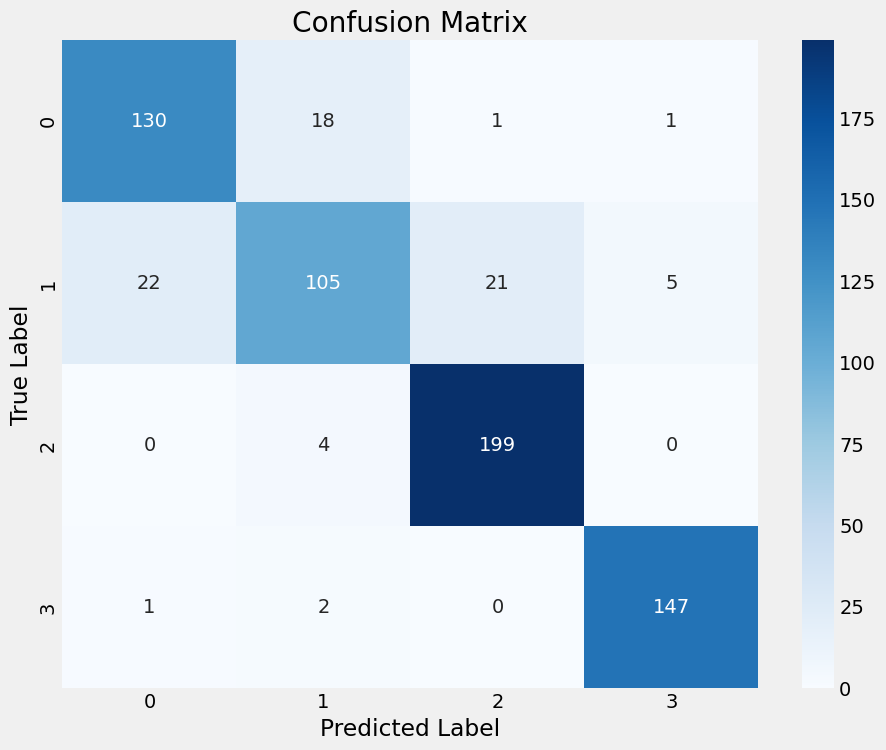

In [44]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1)

class_dict = {
    0: 'glioma_tumor',
    1: 'meningioma_tumor',
    2: 'no_tumor',
    3: 'pituitary_tumor'
}

# Create and display the confusion matrix to show conidence level
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [45]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       150
           1       0.81      0.69      0.74       153
           2       0.90      0.98      0.94       203
           3       0.96      0.98      0.97       150

    accuracy                           0.89       656
   macro avg       0.88      0.88      0.88       656
weighted avg       0.88      0.89      0.88       656



In [46]:
cnn_model.save('cnn_model.h5')

Streanlit Web App

In [47]:
! pip install streamlit pyngrok python-dotenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.6 MB/s eta 0:00:00


In [49]:
from threading import Thread
from pyngrok import ngrok # Encrypted tunnel to localhost
from google.colab import userdata

In [50]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')
ngrok.set_auth_token(ngrok_token)

In [71]:
def run_streamlit():
  os.system('streamlit run /content/app.py --server.port 8500')

In [95]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import PIL.Image
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import os
from dotenv import load_dotenv

load_dotenv()

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

def load_xception_model(model_path):
  img_shape=(299,299,3)
  base_model = tf.keras.applications.Xception(input_shape=img_shape, include_top=False, weights='imagenet', pooling = 'max')
  model = Sequential([
      base_model,
      Flatten(),
      Dropout(rate = 0.3),
      Dense(128, activation='relu'),
      Dropout(rate = 0.25),
      Dense(4, activation='softmax')])
  model.build((None,) + img_shape)

  # Compile the model
  model.compile(Adamax(learning_rate = 0.001),
                loss = 'categorical crossentropy',
                metrics = ['accuracy', Precision(), Recall()])

  model.load_weights(model_path)

  return model

def generate_saliency_map(model, img_array, class_index, img_size):
  # Use GradientTape to compute gradients
    with tf.GradientTape() as tape:
        img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        target_class = predictions[:, class_index]

    # Compute gradients of the target class with respect to input image
    gradients = tape.gradient(target_class, img_tensor)

    # Take the absolute value of gradients
    gradients = tf.math.abs(gradients)

    # Reduce gradients across color channels to get a 2D map
    gradients = tf.reduce_max(gradients, axis=-1).numpy().squeeze()

    # Resize gradients to match original image size
    gradients = cv2.resize(gradients, img_size)

    # Create a circular mask for the brain area
    center = (gradients.shape[1] // 2, gradients.shape[0] // 2)
    radius = min(center[0], center[1]) - 10
    y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
    mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

    # Apply mask to gradients
    gradients *= mask

    # Normalize the gradients within the masked area
    brain_gradients = gradients[mask]
    if brain_gradients.size > 0 and brain_gradients.max() > brain_gradients.min():
        brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
        gradients[mask] = brain_gradients

    # Set a threshold to filter weak gradients
    threshold = np.percentile(gradients[mask], 88)
    gradients[gradients < threshold] = 0

    # Smooth the gradients with a Gaussian blur
    gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

    # Convert gradients to a heatmap
    heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    # Overlay the heatmap on the original image
    original_img = image.img_to_array(img).astype(np.uint8)
    superimposed_img = cv2.addWeighted(heatmap, 0.7, original_img, 0.3, 0)

    # Ensure the output directory exists
    os.makedirs(os.path.join(output_dir, "saliency_maps"), exist_ok=True)

    # Save the saliency map
    saliency_map_path = os.path.join(output_dir, "saliency_maps", uploaded_file.name)
    cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

    return superimposed_img

def generate_explanation(img_path, model_prediction, confidence):
  prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
  The saliency map was generated by a deep learning model trained to classify brain tumors as either glioma, meningioma, pituitary or no tumor.

  The saliency map highlights the regions of the image that the model is focusing on to make its prediction.

  The model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}.

  In your response:
    - Explain what regions of the brain that the model is focusing on, based on the saliency map.
      Refer to the regions highlighted in light cyan, these are the regions that the model is focusing on.
    - Explain the possible reasons as to why the model made the prediction.
    - Don't ever mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan ... '.
    - Limit it to 4 sentences maximum.

  Let's think about this step by step. Verify each step.
  """

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name='gemini-1.5-flash')
  response = model.generate_content([prompt, img])

  return response.text

# The main app begins here
st.title("Brain Tumor Classification")
st.write("Upload Brain MRI image to classify")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])
if uploaded_file is not None:

  selected_model = st.radio("Select Model", ["Xception - Transfer Learning", "Custom CNN"])

  if selected_model == "Xception - Transfer Learning":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299,299)
  else:
    model = load_model('/content/cnn_model.h5')
    img_size = (224,224)

  labels = ['Glioma', 'Meningioma', 'No tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size = img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis = 0)
  img_array /= 255.0 # Scaling to help improve the model's accuracy and training stability

  prediction = model.predict(img_array) # Makes prediction depending on the model

  # Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]
  st.header("Predictions")
  st.write(f"Precited Class: {result}")

  # Data for Plotly Chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  # Create Chart
  fig = go.Figure(go.Bar(
      x = sorted_probabilities,
      y = sorted_labels,
      orientation = 'h',
      marker_color = ['red' if label == result else 'blue' for label in sorted_labels]
  ))

  # Chart Layout
  fig.update_layout(
      title = "Probabilities of Each Class",
      xaxis_title = "Probability",
      yaxis_title = "Class",
      height = 400,
      width = 600,
      yaxis = dict(autorange="reversed")
  )

  # Add values to the bars
  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text = f'{prob:.4f}',
        showarrow = False,
        xanchor = 'left',
        xshift = 5
    )

  st.plotly_chart(fig)

  # Saliency map
  st.header("Saliency Map")
  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)
  col1, col2 = st.columns(2)
  with col1:
    st.image(img, caption="Uploaded Image", use_column_width=True)
  with col2:
    st.image(saliency_map, caption = 'Saliency Map', use_column_width=True)

  st.header("Explanation")
  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])
  st.write(explanation)



Overwriting app.py


In [96]:
thread = Thread(target = run_streamlit)
thread.start()

In [74]:
public_url = ngrok.connect(addr='8500', proto='http', bind_tls=True)
print("Public URL: ", public_url)

PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: Your account may not run more than 3 tunnels over a single ngrok agent session.\nThe tunnels already running on this session are:\ntn_2ozuIuIkqHfJ3qg04tAUeJzliRX, tn_2ozwytwiFgotxlfmr3sLfEjCfBh, tn_2ozx6iE99uaVTbqfldte4jTrGJA\n\r\n\r\nERR_NGROK_324\r\n"}}
